### Singulärwertzerlegung (SVD)

Singulärwertzerlegung ist eine der wichtigsten Methoden zum Lösen von Lösen von Gleichungssystemen (unterbestimmt, überbestimmt, regulär oder singulär). Das spiegelt sich dann auch in einer Vielzahl von Anwendungen wieder. Diese findet man auch häufig untem dem Begriff der Eigenwertanalyse:

* Lastenanalyse und Berechnung von Dämpfungscharakteristika im Ingenieursbereich
* Hauptrichtungen von Kanten und Ecken bei der Bildanalyse
* Registrierung von Punktwolken
* Graphentheorie und als Beispiel davon der Page-Rank Algorithmus von Google
* Kompression
* uvm.

Hier mal ein kleines Beispiel für einen sehr einfachen Ansatz zur Bildkompression. Weitere mathematische Details finden Sie in den Tafelbildern der Vorlesung.


(300, 300) (300,) (600, 600)


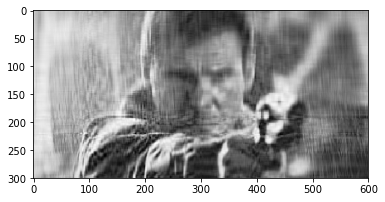

In [27]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

A = mpimg.imread('./images/blade_runner.jpg')
# print(A.shape)

B = A[:,:,1]
# print(B.shape)
# plt.imshow(B, cmap='Greys_r')
U,S,V = np.linalg.svd(B)
print(U.shape, S.shape, V.shape)

P = np.zeros((300,600))

max_eigenvalue = 2000.0
for i in range(S.shape[0]):
    if S[i] > max_eigenvalue:
        P[i,i] = S[i]

C = np.dot(U,np.dot(P,V))
plt.imshow(C, cmap='Greys_r')

### Hauptkomponentenanalyse (PCA)

Ziel der Hauptkomponentenanalyse (engl. principal component analysis (PCA)) ist es einen Datensatz, welcher in Form einer Menge von Punkten im $\mathbb{R}^n$ gegeben ist, in einem neuen Koordinatensystem darzustellen. Die erste Koordinatenachse wird dabei so gewählt, dass der Fehler, welcher bei der Projektion der Datenpunkte auf die Koordinatenachse entsteht, minimal unter allen Koordinatenachsen ist. Analog werden die anderen Koordinatenachsen gewählt. Die zweite Koordinatenachse wird zum Beispiel so gewählt, dass der Fehler der Projektion auf den Unterraum, welcher durch die erste und zweite Koordinatenachse aufgespannt wird, minimal ist.
Wir wollen uns die Hauptkomponentenanalyse an einem einfachen Beispiel anschauen. Gegeben sei dazu eine Menge von zweidimensionalen Punkten $x_i \in \mathbb{R}^2 , i = 1, \dots , m$ (Abbildung 1(a)). Der Einfachheit halber wollen wir annehmen, dass der Schwerpunkt der Daten im Ursprung liegt (Ansonsten müssen wir die Daten in Ihren Ursprung verschieben). Gesucht ist nun eine neue Koordinatenachse, so dass beim projizieren der Datenpunkte ein minimaler Fehler entsteht. Eine Koordinatenachse lässt sich einfach mittels eines Einheitsvektor $w$ (Abbildung 1) beschreiben. Die Projektion $p_i$ des Datenpunktes $x_i$ auf den durch $w$ aufgespannten Unterraum (d.h. die durch $w$ definierte Gerade) ist dann gegeben durch:

$$
p_i = (x_i^T \cdot w)  w
$$

Der Fehler, welcher bei der Projektion entsteht, lässt sich leicht mittels des Satzes von Pythagoras bestimmen:

$$
||r_i||^2 = || x_i ||^2 − ||p_i||^2
$$

Summieren wir nun $||r_i||^2$ für alle Datenpunkte auf, so erhalten wir ein Maß für den Fehler der Projektion der Datenpunkte auf die Koordinatenachse $w$. Indem wir über alle Koordinatenachsen minimieren, erhalten wir die Koordinatenachse mit minimalem Fehler (Gleichung a):

$$
\arg \min_{||w|| = 1} \sum_{i=1}^{m} || r_i ||^2 = \arg \min_{||w|| = 1} \sum_{i=1}^{m} ( ||x_i||^2 - ||p_i||^2) = \arg \max_{||w|| = 1} \sum_{i=1}^{m} ( ||p_i||^2)
$$

Dabei nutzten wir aus, dass $||x_i||^2$ bzgl. der Minimierung konstant ist und vernachlässigt werden kann. Außerdem nutzen wir aus, dass das Minimieren des Negativen eines nicht negativen Ausdruckes äquivalent zum Maximieren des Ausdruckes ist.
Wir wollen nun das Maximierungsproblem unter Verwendung der SVD lösen. Dazu müssen wir zunächst die obige Gleichung in Matrixnotation schreiben. Als erstes schreiben wir $||p_i||^2$ als Skalarprodukt

$$
|| p_i ||^2 = || (x_i^T \cdot w)  w ||^2 = (x_i^T \cdot w)^2 || w ||^2 = (x_i^T \cdot w)^2
$$

wobei wir ausnutzen, dass $w$ ein Einheitsvektor ist. Die Datenpunkte fassen wir in einer Matrix

$$
X = \begin{pmatrix} x_1^T \\ 
 \vdots \\
 x_m^T \\
 \end{pmatrix}
$$
zusammen und zwar so, dass jede Zeile genau einem Datenpunkt entspricht. Der Vektor $Xw$ besteht
dann aus den Skalarprodukten $x_i^T w = ||p_i||$ und wir erhalten:

$$
\sum_{i=1}^{m} ||p_i||^2 = || Xw ||^2
$$

Gleichung (a) können wir also auch schreiben als:

$$
\arg \max_{||w|| = 1} \sum_{i=1}^{m} ( ||p_i||^2) = \arg \max_{||w|| = 1} \sum_{i=1}^{m} ( ||Xw||^2)
$$

Sei nun $X = U \Sigma V^T$ eine SVD von $X$. Die SVD besagt (wie in der Vorlesung besprochen), dass $\max_{||w||=1} ||Xw||^2 = \sigma_1^2$ ist. Das Maximum (der größte Eigenvektor korrespondierend zum größten Eigenwert) steht dabei von der ersten Spalte von V. Zusammengefasst erhalten wir somit:

$$
\arg \max_{||w|| = 1} || Xw ||^2 = v_1
$$

In folgendem Beispiel werden die Hauptkomponenten einer künstlich erzeugten Punktwolke berechnet.
Die Erzeugung der Punktwolke erfolgt in zwei Schritten. Zunächst wird eine Matrix mit zufälligen (nor-
malverteilten) Koordinaten erzeugt (np.random.randn). Durch Multiplikation der ersten und zweiten
Spalte mit $\sqrt{2.0}$ und $\sqrt{0.25}$ wird dann erreicht, dass die erste und zweite Koordinate der Punkte un- terschiedliche Varianzen haben (nämlich 2.0 und 0.25). Das bedeutet also, dass die Punktwolke stärker entlang der ersten Koordinatenachse ausgedehnt ist. Durch Rotation um 25◦ erhalten wir somit einen Datensatz welcher entlang der $25$Grad-Achse ausgedehnt ist.

Für die Bestimmung der Hauptkomponenten wird zunächst der Schwerpunkt der Punktwolke berechnet und dann abgezogen um den Schwerpunkt in den Koordinatenursprung zu verschieben. Nun wird eine SVD der Punktwolke bestimmt. Zu beachten ist hier, dass von numpy.linalg.svd nicht $V$ sondern $V^T$ zurückgegeben wird. Das bedeutet die i-te Spalte von $V$ findet sich in $V[i]$. Die Singulärwerte stellen ein Maß für die Ausdehnung der Daten in Richtung der jeweiligen Hauptachse dar (genauer:  $\sqrt(\sigma_i^2/(m − 1))$ ist die korrigierte Stichprobenvarianz). Zur besseren Visualisierung werden daher die Hauptkomponenten mit dem dreifachen der geschätzten Standardabweichungen multipliziert.


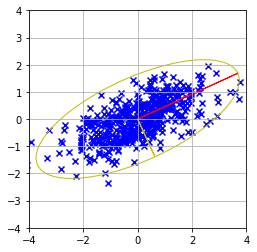

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt, atan2

N = 500
std_x = sqrt(2.0)
std_y = sqrt(0.25)
theta = np.deg2rad(25.0)
# generate point cloud
A = np.random.randn(N, 2)
A[:,0] *= std_x
A[:,1] *= std_y
cn = np.cos(theta)
sn = np.sin(theta)
R =  np.array([[cn,-sn],[sn,cn]])
P = R.dot(A.T).T
# subtract mean to move center to coordinate origin
# A -= A.mean(0)
# compute principal components
U,S,V = np.linalg.svd(P, full_matrices=0)
std1 = sqrt(S[0]**2 / (N-1))
std2 = sqrt(S[1]**2 / (N-1))
pc1 = V[0] * 3.0 * std1
pc2 = V[1] * 3.0 * std2
# show ellipse defined by principal components and estimated standard deviation
plt.gca().add_artist(matplotlib.patches.Ellipse(xy=(0,0), width=6*std1,height=6*std2, 
                                                angle=np.rad2deg(atan2(pc1[1], pc1[0])), fill=False, color='y'))
# plot point cloud
plt.scatter(P[:,0], P[:,1], c='b', marker='x')
# plot principal components
plt.arrow( 0.0, 0.0, pc1[0], pc1[1], color='r', width=0.005, length_includes_head=True)
plt.arrow( 0.0, 0.0, pc2[0], pc2[1], color='y', width=0.005, length_includes_head=True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

Im folgenden ist die Ausgabe eines Programmlaufes zu sehen. Die erste Hauptachse ist in rot und die zweite Hauptachse ist in gelb eingezeichnet. Zur besseren Visualisierung ist außerdem die durch die skalierten Hauptkomponenten definierte Ellipse eingezeichnet.

### Zusammenhang von SVD und PCA


Um die Eigenwerte und Eigenvektoren der PCA zu berechnen, benötigt man die Kovarianzmatrix. Diese ist das Produkt von $XX^T$, wobei $X$ die Datenmatrix ist.
Die Kovarianzmatrix ist immer symmetrisch und diagonalisierbar und die Eigenvektoren sind durch Normalisierung orthonormal.

$$
XX^T = WDW^T
$$

Eine SVD der Matrix $X$ zu berechnen ergibt dagegen folgendes:

$$
X = U \Sigma V^T
$$

Aus dieser Matrixzerlegung dann die Kovarianzmatrix zu berechnen, gibt folgendes:
$$
XX^T = (U \Sigma V^T)(U \Sigma V^T)^T
$$
$$
XX^T = (U \Sigma V^T)(V \Sigma U^T)
$$

Da $V$ eine orthogonale Matrix ist, gilt: $V^TV = I$ und damit

$$
XX^T = U \Sigma^2 U^T
$$

Den Zusammenhang kann man hier leicht sehen: Die Wurzel der Eigenwerte von $XX^T$ sind die Singulärwerte von $X$.
Zudem ist es aus numerischer Sicht deutlich sinnvoller die PCA durch die SVD zu berechnen, da bei der Berechnung von $XX^T$ (als Kovarianzmatrix zu Beginn der Berechnung) Gleitkommadarstellungsprobleme auftreten können. 